## Data Preprocessing

In [1]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
# Multi-class
def fix_label(dataset):
    # fix class (Dos,Probe,R2L,U2L)
    dataset['label'].replace(['apache2','back','mailbomb','processtable','teardrop',
                              'smurf','land','neptune','pod','udpstorm'],'Dos',inplace=True)
    dataset['label'].replace(['ipsweep','satan','nmap','portsweep',
                              'mscan','saint'],'Probe',inplace=True)
    dataset['label'].replace(['ftp_write','guess_passwd','imap','spy',
                              'warezclient','warezmaster','multihop','phf',
                              'named','sendmail','snmpguess','xlock','xsnoop',
                              'worm','snmpgetattack','httptunnel'],'R2L',inplace=True)
    dataset['label'].replace(['buffer_overflow','loadmodule','perl','rootkit',
                              'ps','xterm','sqlattack'],'U2R',inplace=True)
    dataset['label'].replace(['normal'],'Normal',inplace=True)

In [3]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label' , 'difficulty_level']

In [4]:
# Read Train Dataset
trainDataset = pd.read_csv('./datasets/KDDTrain+.csv', header=None, names=column_names)
# Remove last column Difficult level
del trainDataset['difficulty_level']
# Fix Label
fix_label(trainDataset)

In [5]:
# Read Test Dataset
testDataset = pd.read_csv('./datasets/KDDTest+.csv', header=None, names=column_names)
# Remove last column Difficult level
del testDataset['difficulty_level']
# Fix Label
fix_label(testDataset)

In [6]:
trainDataset.shape

(125973, 42)

In [7]:
testDataset.shape

(22544, 42)

In [8]:
trainDataset['label'].value_counts()

label
Normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [9]:
testDataset['label'].value_counts()

label
Normal    9711
Dos       7458
R2L       2887
Probe     2421
U2R         67
Name: count, dtype: int64

### Label Encoding attack type

In [10]:
label_mapping = {'Normal': 0, 'Dos': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}
trainDataset['label'] = trainDataset['label'].map(label_mapping)
testDataset['label'] = testDataset['label'].map(label_mapping)

In [11]:
trainDataset['label'].value_counts()

label
0    67343
1    45927
2    11656
3      995
4       52
Name: count, dtype: int64

In [12]:
testDataset['label'].value_counts()

label
0    9711
1    7458
3    2887
2    2421
4      67
Name: count, dtype: int64

### One Hot Encoding

In [13]:
# concat trainDataset and testDataset -> all categories types -> same shape after encoding
columns_to_encode = ['protocol_type', 'service', 'flag']
encodedDataset = pd.get_dummies(pd.concat([trainDataset, testDataset]), columns=columns_to_encode).astype(int)

In [14]:
encodedDataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#split
trainDataset = encodedDataset.iloc[:len(trainDataset)]
testDataset = encodedDataset.iloc[len(trainDataset):]

In [16]:
trainDataset.shape

(125973, 123)

In [17]:
testDataset.shape

(22544, 123)

In [18]:
encodedDataset.columns[:39]

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

### Logarithming Scaling

In [19]:
trainDataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
print('trainDataset (duration): min=',trainDataset['duration'].min(),', max=',trainDataset['duration'].max())
print('testDataset (duration): min=',testDataset['duration'].min(),', max=',testDataset['duration'].max())
print('trainDataset (src_bytes): min=',trainDataset['src_bytes'].min(),', max=',trainDataset['src_bytes'].max())
print('testDataset (src_bytes): min=',testDataset['src_bytes'].min(),', max=',testDataset['src_bytes'].max())
print('trainDataset (dst_bytes): min=',trainDataset['dst_bytes'].min(),', max=',trainDataset['dst_bytes'].max())
print('testDataset (dst_bytes): min=',testDataset['dst_bytes'].min(),', max=',testDataset['dst_bytes'].max())

trainDataset (duration): min= 0 , max= 42908
testDataset (duration): min= 0 , max= 57715
trainDataset (src_bytes): min= 0 , max= 1379963888
testDataset (src_bytes): min= 0 , max= 62825648
trainDataset (dst_bytes): min= 0 , max= 1309937401
testDataset (dst_bytes): min= 0 , max= 1345927


In [21]:
# Logarithmic Scaling for duration (+1 to avoid log10(0))
trainDataset.loc[:, 'duration'] = np.log10(trainDataset['duration']+1)
testDataset.loc[:, 'duration'] = np.log10(testDataset['duration']+1)
# Logarithmic Scaling for src_bytes (+1 to avoid log10(0))
trainDataset.loc[:, 'src_bytes'] = np.log10(trainDataset['src_bytes']+1)
testDataset.loc[:, 'src_bytes'] = np.log10(testDataset['src_bytes']+1)
# Logarithmic Scaling for dst_bytes (+1 to avoid log10(0))
trainDataset.loc[:, 'dst_bytes'] = np.log10(trainDataset['dst_bytes']+1)
testDataset.loc[:, 'dst_bytes'] = np.log10(testDataset['dst_bytes']+1)

In [22]:
print('trainDataset (duration): min=',trainDataset['duration'].min(),', max=',trainDataset['duration'].max())
print('testDataset (duration): min=',testDataset['duration'].min(),', max=',testDataset['duration'].max())
print('trainDataset (src_bytes): min=',trainDataset['src_bytes'].min(),', max=',trainDataset['src_bytes'].max())
print('testDataset (src_bytes): min=',testDataset['src_bytes'].min(),', max=',testDataset['src_bytes'].max())
print('trainDataset (dst_bytes): min=',trainDataset['dst_bytes'].min(),', max=',trainDataset['dst_bytes'].max())
print('testDataset (dst_bytes): min=',testDataset['dst_bytes'].min(),', max=',testDataset['dst_bytes'].max())

trainDataset (duration): min= 0.0 , max= 4.6325483933594604
testDataset (duration): min= 0.0 , max= 4.761296224740867
trainDataset (src_bytes): min= 0.0 , max= 9.139867721898897
testDataset (src_bytes): min= 0.0 , max= 7.798136983626141
trainDataset (dst_bytes): min= 0.0 , max= 9.117250542514133
testDataset (dst_bytes): min= 0.0 , max= 6.129021828061026


### Split X_train, y_train, X_test, y_test

In [23]:
X_train = trainDataset.drop(columns=['label'])
y_train = trainDataset['label']
X_test = testDataset.drop(columns=['label'])
y_test = testDataset['label']

In [24]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,2.691965,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,2.167317,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.000000,2.367356,3.911371,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,2.301030,2.624282,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,0.954243,2.025306,2.164353,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0.000000,3.348694,2.585461,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
X_train.columns[:39]

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type_icmp'],
      dtype='object')

### Feature Scaling

In [26]:
scaler = StandardScaler()

In [27]:
X_train[X_train.columns[:39]] = scaler.fit_transform(X_train[X_train.columns[:39]])

In [28]:
X_test[X_test.columns[:39]] = scaler.transform(X_test[X_test.columns[:39]])

# Train Models: Default parameters

## K-Nearest Neighbors

In [30]:
print('Training K-Nearest Neighbors...')
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
end_time = time.time()
knn_training_time_default = end_time - start_time
knn_pred = knn_model.predict(X_test)
knn_accuracy_default = accuracy_score(y_test, knn_pred)
print('Training time for K-Nearest Neighbors:', knn_training_time_default, 'seconds')
print('Accuracy for K-Nearest Neighbors:', knn_accuracy_default)

Training K-Nearest Neighbors...
Training time for K-Nearest Neighbors: 0.07206559181213379 seconds
Accuracy for K-Nearest Neighbors: 0.7441447835344216


In [31]:
knn_precision_default = precision_score(y_test, knn_pred, average='weighted')
knn_recall_default = recall_score(y_test, knn_pred, average='weighted')
knn_f1_default = f1_score(y_test, knn_pred, average='weighted')
print('Precision for K-Nearest Neighbors:', knn_precision_default)
print('Recall for K-Nearest Neighbors:', knn_recall_default)
print('F1-score for K-Nearest Neighbors:', knn_f1_default)

Precision for K-Nearest Neighbors: 0.8033102685506447
Recall for K-Nearest Neighbors: 0.7441447835344216
F1-score for K-Nearest Neighbors: 0.7050719970443756


### Confusion matrix

In [32]:
conf_matrix = confusion_matrix(y_test, knn_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[9428   89  186    2    6]
 [1601 5480  377    0    0]
 [ 565  180 1676    0    0]
 [2676    1   29  178    3]
 [  48    0    0    5   14]]


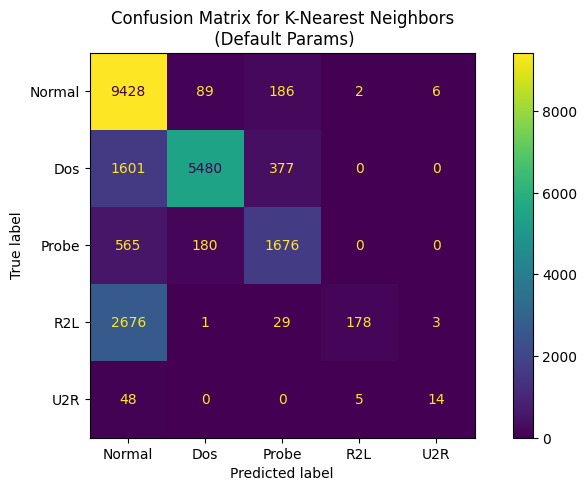

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, ax=ax)
ax.xaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
ax.yaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
_ = ax.set_title('Confusion Matrix for K-Nearest Neighbors\n (Default Params)')

## SVM

In [34]:
print('Training SVM...')
start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, y_train)
end_time = time.time()
svm_training_time_default = end_time - start_time
svm_pred = svm_model.predict(X_test)
svm_accuracy_default = accuracy_score(y_test, svm_pred)
print('Training time for SVM:', svm_training_time_default, 'seconds')
print('Accuracy for SVM:', svm_accuracy_default)

Training SVM...
Training time for SVM: 39.773144483566284 seconds
Accuracy for SVM: 0.742680979418027


In [35]:
svm_precision_default = precision_score(y_test, svm_pred, average='weighted')
svm_recall_default = recall_score(y_test, svm_pred, average='weighted')
svm_f1_default = f1_score(y_test, svm_pred, average='weighted')
print('Precision for SVM:', svm_precision_default)
print('Recall for SVM:', svm_recall_default)
print('F1-score forSVM:', svm_f1_default)

Precision for SVM: 0.8017743804729061
Recall for SVM: 0.742680979418027
F1-score forSVM: 0.7031630889095144


### Confusion matrix

In [36]:
conf_matrix = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[9407   89  208    3    4]
 [1700 5377  381    0    0]
 [ 464  180 1777    0    0]
 [2640    0   73  174    0]
 [  54    0    0    5    8]]


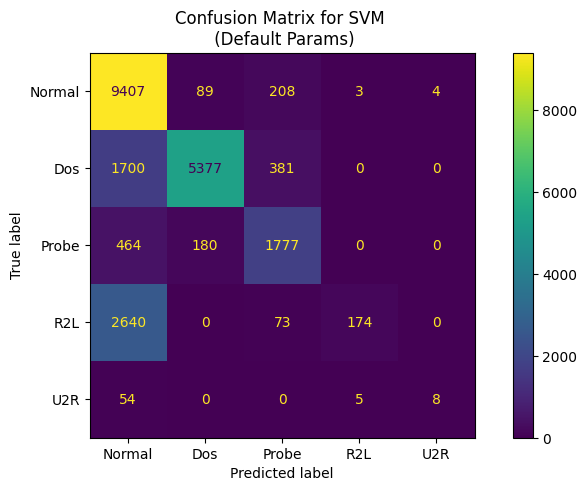

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, ax=ax)
ax.xaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
ax.yaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
_ = ax.set_title('Confusion Matrix for SVM \n (Default Params)')

## Plot

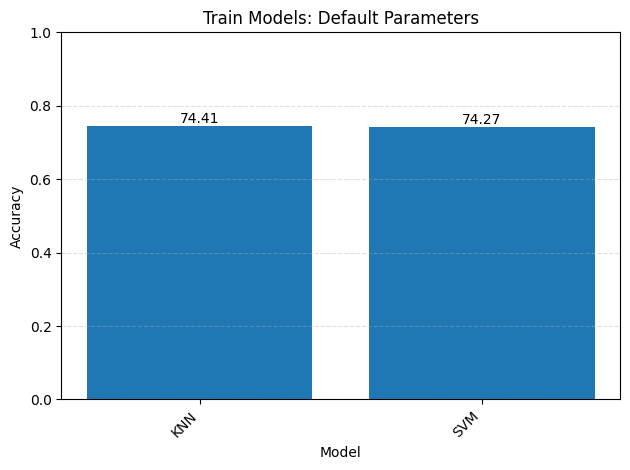

In [38]:
# model names
models = ['KNN', 'SVM']
# accuracies
accuracies = [knn_accuracy_default, svm_accuracy_default]

# Plotting the bars
plt.figure()
bars = plt.bar(models, accuracies, color='C0')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train Models: Default Parameters')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy*100:.2f}', 
             ha='center', va='bottom')

plt.show()

# Train Models: SMOTE

## SMOTE

In [39]:
# Reset X_train,X_test,Y_train,y_test
X_train = trainDataset.drop(columns=['label'])
y_train = trainDataset['label']
X_test = testDataset.drop(columns=['label'])
y_test = testDataset['label']

In [40]:
y_train.value_counts() # label_mapping = {'Normal': 0, 'Dos': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}

label
0    67343
1    45927
2    11656
3      995
4       52
Name: count, dtype: int64

### Plot: Before Smote

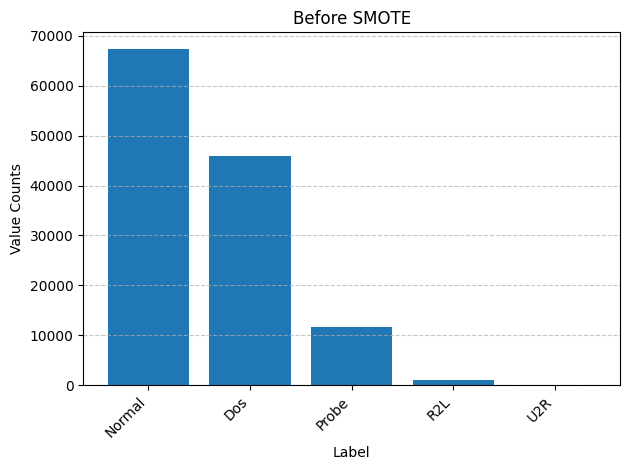

In [41]:
# Attack type
labels = ['Normal', 'Dos', 'Probe', 'R2L', 'U2R']
# counts
counts = list(y_train.value_counts())

plt.figure()
plt.bar(labels, counts, color='C0')
plt.xlabel('Label')
plt.ylabel('Value Counts')
plt.title('Before SMOTE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Applying SMOTE

In [42]:
# Define the SMOTE
smote = SMOTE(sampling_strategy={2: 30000, 3: 30000, 4: 30000})
# Apply SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)

In [43]:
y_train.value_counts() # label_mapping = {'Normal': 0, 'Dos': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}

label
0    67343
1    45927
3    30000
2    30000
4    30000
Name: count, dtype: int64

### Plot: After SMOTE

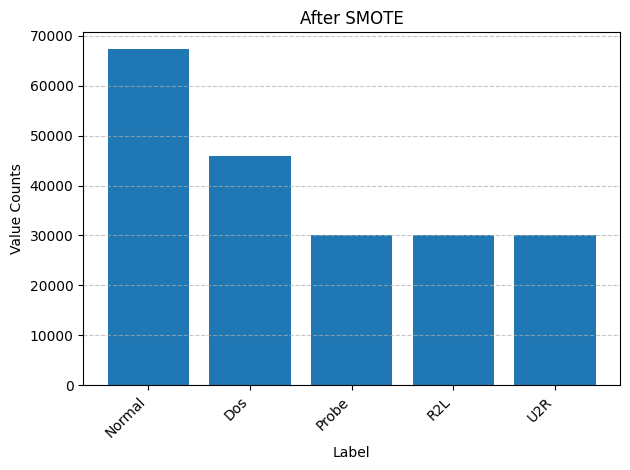

In [44]:
# Attack type
labels = ['Normal', 'Dos', 'Probe', 'R2L', 'U2R']
# counts
counts = list(y_train.value_counts())

plt.figure()
plt.bar(labels, counts, color='C0')
plt.xlabel('Label')
plt.ylabel('Value Counts')
plt.title('After SMOTE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature Scaling

In [45]:
# We have reset the X_train,X_test, we used SMOTE and we have to use feature scaling again. Feature scaling is used after SMOTE
scaler = StandardScaler()

X_train[X_train.columns[:39]] = scaler.fit_transform(X_train[X_train.columns[:39]])
X_test[X_test.columns[:39]] = scaler.transform(X_test[X_test.columns[:39]])

## K-Nearest Neighbors

In [46]:
print('Training K-Nearest Neighbors...')
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
end_time = time.time()
knn_training_time_smote = end_time - start_time
knn_pred = knn_model.predict(X_test)
knn_accuracy_default_smote = accuracy_score(y_test, knn_pred)
print('Training time for K-Nearest Neighbors:', knn_training_time_smote, 'seconds')
print('Accuracy for K-Nearest Neighbors:', knn_accuracy_default_smote)

Training K-Nearest Neighbors...
Training time for K-Nearest Neighbors: 0.13712334632873535 seconds
Accuracy for K-Nearest Neighbors: 0.8049148332150461


In [47]:
knn_precision_default_smote = precision_score(y_test, knn_pred, average='weighted')
knn_recall_default_smote = recall_score(y_test, knn_pred, average='weighted')
knn_f1_default_smote = f1_score(y_test, knn_pred, average='weighted')
print('Precision for K-Nearest Neighbors:', knn_precision_default_smote)
print('Recall for K-Nearest Neighbors:', knn_recall_default_smote)
print('F1-score for K-Nearest Neighbors:', knn_f1_default_smote)

Precision for K-Nearest Neighbors: 0.8290013295818394
Recall for K-Nearest Neighbors: 0.8049148332150461
F1-score for K-Nearest Neighbors: 0.7972959577010462


In [48]:
print('Accuracy (Default Params):', knn_accuracy_default)
print('Accuracy (Default Params with SMOTE):', knn_accuracy_default_smote)

Accuracy (Default Params): 0.7441447835344216
Accuracy (Default Params with SMOTE): 0.8049148332150461


### Confusion matrix

In [49]:
conf_matrix = confusion_matrix(y_test, knn_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[9410   88  192   11   10]
 [1433 5485  383  157    0]
 [ 325  180 1916    0    0]
 [1457    0   80 1309   41]
 [  22    0    0   19   26]]


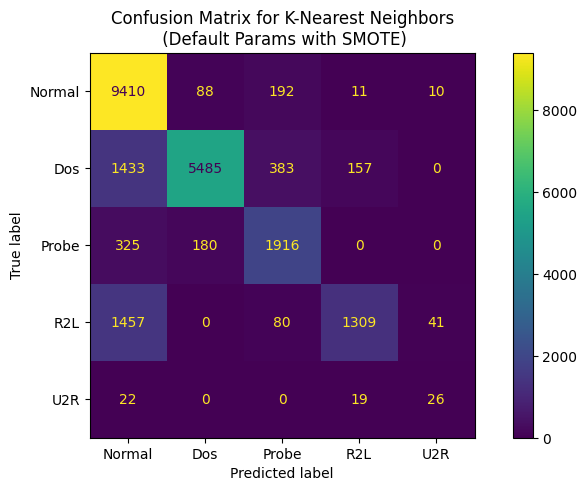

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, ax=ax)
ax.xaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
ax.yaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
_ = ax.set_title('Confusion Matrix for K-Nearest Neighbors\n (Default Params with SMOTE)')

## SVM

In [51]:
print('Training SVM...')
start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, y_train)
end_time = time.time()
svm_training_time_smote = end_time - start_time
svm_pred = svm_model.predict(X_test)
svm_accuracy_default_smote = accuracy_score(y_test, svm_pred)
print('Training time for SVM:', svm_training_time_smote, 'seconds')
print('Accuracy for SVM:', svm_accuracy_default_smote)

Training SVM...
Training time for SVM: 115.98540449142456 seconds
Accuracy for SVM: 0.7748846699787083


In [52]:
svm_precision_default_smote = precision_score(y_test, svm_pred, average='weighted')
svm_recall_default_smote = recall_score(y_test, svm_pred, average='weighted')
svm_f1_default_smote = f1_score(y_test, svm_pred, average='weighted')
print('Precision for SVM:', svm_precision_default_smote)
print('Recall for SVM:', svm_recall_default_smote)
print('F1-score forSVM:', svm_f1_default_smote)

Precision for SVM: 0.8166139880113196
Recall for SVM: 0.7748846699787083
F1-score forSVM: 0.7583427265994297


In [53]:
print('Accuracy (Default Params):', svm_accuracy_default)
print('Accuracy (Default Params with SMOTE):', svm_accuracy_default_smote)

Accuracy (Default Params): 0.742680979418027
Accuracy (Default Params with SMOTE): 0.7748846699787083


### Confusion matrix

In [54]:
conf_matrix = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[9390   89  213    6   13]
 [1521 5386  519   32    0]
 [ 387  180 1854    0    0]
 [1978    0   77  815   17]
 [  38    0    0    5   24]]


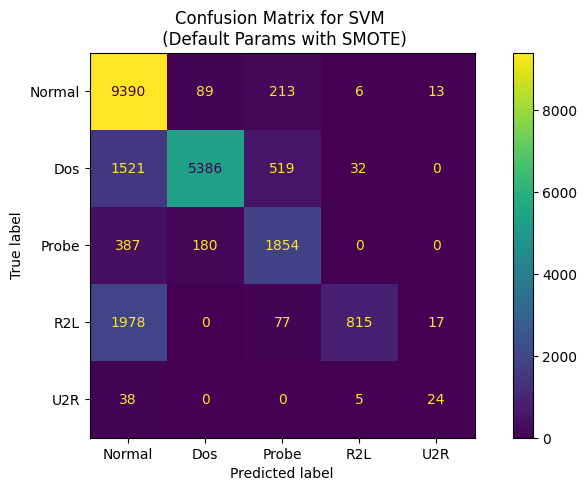

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, ax=ax)
ax.xaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
ax.yaxis.set_ticklabels(['Normal','Dos','Probe','R2L','U2R'])
_ = ax.set_title('Confusion Matrix for SVM \n (Default Params with SMOTE)')

## Plot

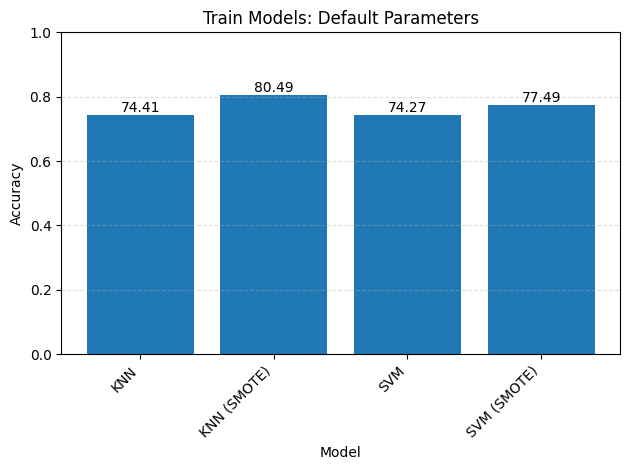

In [56]:
# model names
models = ['KNN','KNN (SMOTE)', 'SVM',  'SVM (SMOTE)']
# accuracies
accuracies = [knn_accuracy_default, knn_accuracy_default_smote, svm_accuracy_default, svm_accuracy_default_smote]

# Plotting the bars
plt.figure()
bars = plt.bar(models, accuracies, color='C0')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train Models: Default Parameters')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy*100:.2f}', 
             ha='center', va='bottom')

plt.show()